In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import uuid

f:\a02_env_ware\ana\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


加载数据

In [3]:
# 读取数据
df = pd.read_csv('BTC_USDT_1day_2021.1.1-2021.12.31一年数据.csv')

In [4]:
df.head()

,Unnamed: 0,datatime,open,high,low,close,volume
0,0,1609459200000,28923.63,29600.00,28624.57,29331.69,54182.925011
1,1,1609545600000,29331.70,33300.00,28946.53,32178.33,129993.873362
2,2,1609632000000,32176.45,34778.11,31962.99,33000.05,120957.566750
3,3,1609718400000,33000.05,33600.00,28130.00,31988.71,140899.885690
4,4,1609804800000,31989.75,34360.00,29900.00,33949.53,116049.997038


波动率

In [ ]:
''' 
range = (最高价 - 最低价) / 开盘价
'''

# 计算 range
df['range'] = (df['high'] - df['low'])/df['open']

# 查看结果
df.head()

,Unnamed: 0,datatime,open,high,low,close,volume,range
0,0,1609459200000,28923.63,29600.00,28624.57,29331.69,54182.925011,0.033724
1,1,1609545600000,29331.70,33300.00,28946.53,32178.33,129993.873362,0.148422
2,2,1609632000000,32176.45,34778.11,31962.99,33000.05,120957.566750,0.087490
3,3,1609718400000,33000.05,33600.00,28130.00,31988.71,140899.885690,0.165757
4,4,1609804800000,31989.75,34360.00,29900.00,33949.53,116049.997038,0.139420


In [6]:
df.describe()

,Unnamed: 0,datatime,open,high,low,close,volume,range
count,365.000000,3.650000e+02,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,182.000000,1.625184e+12,47352.319562,48806.641726,45674.194219,47400.003041,69924.032873,0.068573
std,105.510663,9.116121e+09,9818.383868,9829.038454,9776.770493,9770.992384,38349.740979,0.039580
min,0.000000,1.609459e+12,28923.630000,29600.000000,28130.000000,29331.690000,19135.516130,0.018828
25%,91.000000,1.617322e+12,38207.040000,39780.000000,36161.950000,38290.240000,44855.850990,0.043043
50%,182.000000,1.625184e+12,47799.990000,49264.300000,46555.000000,47800.000000,58912.256128,0.058180
75%,273.000000,1.633046e+12,56150.010000,57777.000000,53950.000000,56150.010000,84343.755621,0.083358
max,364.000000,1.640909e+12,67525.820000,69000.000000,66222.400000,67525.830000,354347.243161,0.317035


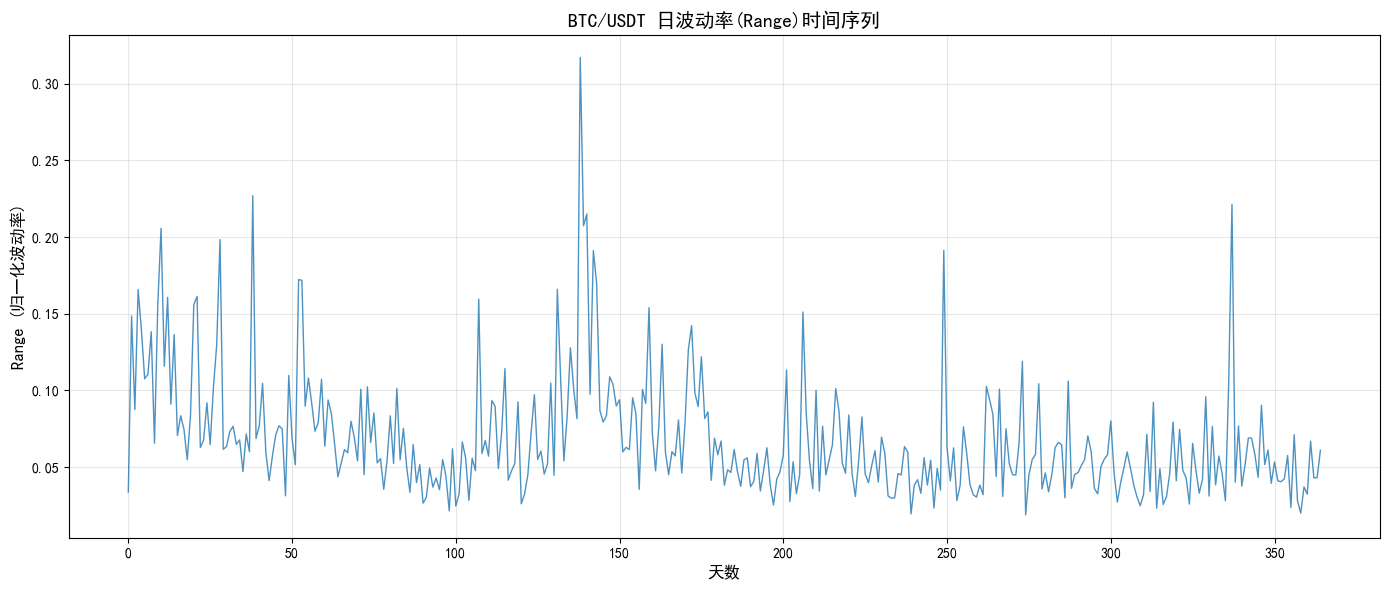

In [7]:
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 绘制 range 的时间序列图
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['range'], linewidth=1, alpha=0.8)
plt.title('BTC/USDT 日波动率(Range)时间序列', fontsize=14)
plt.xlabel('天数', fontsize=12)
plt.ylabel('Range (归一化波动率)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

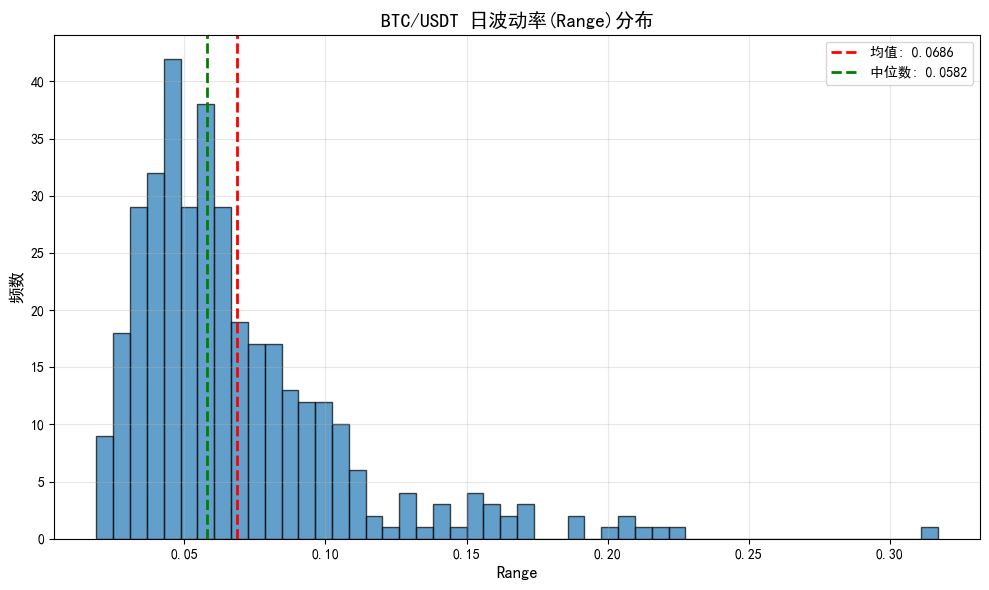

In [8]:
# 绘制 range 的分布直方图
plt.figure(figsize=(10, 6))
plt.hist(df['range'], bins=50, edgecolor='black', alpha=0.7)
plt.title('BTC/USDT 日波动率(Range)分布', fontsize=14)
plt.xlabel('Range', fontsize=12)
plt.ylabel('频数', fontsize=12)
plt.axvline(df['range'].mean(), color='red', linestyle='--', linewidth=2, label=f'均值: {df["range"].mean():.4f}')
plt.axvline(df['range'].median(), color='green', linestyle='--', linewidth=2, label=f'中位数: {df["range"].median():.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
# 计算 range 的自相关性
''' 
> 0.3       强预测价值
0.2 - 0.3   中预测价值
0.1 - 0.2   弱预测价值
< 0.1       无预测价值
'''
for lag in range(1, 11):
    autocorr = df['range'].autocorr(lag=lag)
    print(f"间隔 {lag} 周期的自相关系数: {autocorr:.4f}")

间隔 1 周期的自相关系数: 0.3783
间隔 2 周期的自相关系数: 0.3395
间隔 3 周期的自相关系数: 0.2848
间隔 4 周期的自相关系数: 0.3185
间隔 5 周期的自相关系数: 0.2515
间隔 6 周期的自相关系数: 0.2461
间隔 7 周期的自相关系数: 0.2858
间隔 8 周期的自相关系数: 0.2398
间隔 9 周期的自相关系数: 0.2062
间隔 10 周期的自相关系数: 0.1623


In [10]:
# 证明 相关性(波动率聚集效应) 不是巧合 不是随机的

''' 
置信区间
p_value < 0.05 表明 置信区间 95% 显著(95%不是随机的)
'''

from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box检验
lb_result = acorr_ljungbox(df['range'], lags=10, return_df=True)
print(lb_result[['lb_stat', 'lb_pvalue']].head())


      lb_stat     lb_pvalue
1   52.540328  4.215034e-13
2   94.450054  3.093367e-21
3  123.964178  1.080366e-26
4  160.364383  1.221173e-33
5  182.832947  1.328425e-37


利用波动率构建交易规则

In [ ]:
''' 
1 理论依据 = 波动率聚集效应 = 波动率自相关性

2 交易方向
昨天涨 今天看跌 做多
昨天涨 今天看涨 做空
共构建两个策略

3 交易价格计算
range = (p_high[t-1] - p_low[t-1]) / p_open[t-1]
(p[t] - p_open[t])/p_open[t] = - k1 * range[t-1]
其中p[t] 为当天预测的限价单

p[t] = k1 * pre_range * p_open[t] + p_open[t]
p[t] = p_open[t] * (1 + k1 * pre_range)


4 平仓条件
1 止盈止损各50% (50pips) 
2 最多持有1天


5 参数优化
k1 的扫描范围是 0-1 step = 0.02
k1 越大 说明对昨天波动的反应越强烈

'''

'\n1 \np[t] = 预测的收盘价 = 挂单\n(p[t] - p_open[t])/p_open[t] = 波动率 = - k1 * range[t-1]\nrange = (p_high[t-1] - p_low[t-1]) / p_open[t-1]\n\np[t] = -k1 * p_open[t] * (p_high[t-1] - p_low[t-1]) / p_open[t-1] + p_open[t]\n负号的意思是往反方向做 比如作天涨价 今天看跌 波动的概率>趋势持续的概率\n2 止盈止损各50% (50pips) 最多持有1天\n3 只做多 或 只做空 共构建两个策略\n4 k1 的扫描范围是 0-1 step = 0.02 '